In [1]:
import uproot3
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


# %matplotlib inline

In [2]:
file = uproot3.open('../vertexperformance_AMVF.root')

In [3]:
file.keys()

[b'Truth_Vertex_PV_Selected;6',
 b'Truth_Vertex_PV_Selected;5',
 b'Reco_Vertex;4',
 b'Reco_Vertex;3',
 b'amvf;1']

In [4]:
truth_tree_arrays = file["Truth_Vertex_PV_Selected"].arrays(namedecode="utf-8")

In [5]:
plotting_objects = [*truth_tree_arrays.keys()][25:31]

In [6]:
plotting_objects

['truth_vtx_fitted_trk_d0',
 'truth_vtx_fitted_trk_z0',
 'truth_vtx_fitted_trk_phi',
 'truth_vtx_fitted_trk_theta',
 'truth_vtx_fitted_trk_qp',
 'truth_vtx_fitted_trk_time']

In [7]:
truth_vtx_fitted_trk_vtxID = truth_tree_arrays['truth_vtx_fitted_trk_vtxID']

In [31]:
# truth_vtx_fitted_trk_vtxID_arr = np.array(truth_vtx_fitted_trk_vtxID[N])


Text(0, 0.5, 'truth_vtx_fitted_trk_z0')

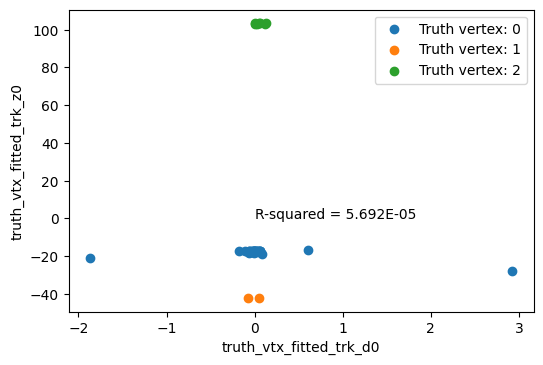

In [9]:
N = 0
n_vtx = np.max(truth_vtx_fitted_trk_vtxID[N])
# plt.figure(1, dpi=200)
fig, ax = plt.subplots(dpi=100)  # Create a figure and an axes.
for i in range(n_vtx+1):
    label = np.where(truth_vtx_fitted_trk_vtxID[N]==i)
    plt.scatter(truth_tree_arrays[plotting_objects[0]][N][label], truth_tree_arrays[plotting_objects[1]][N][label], label= f"Truth vertex: {i}")

r_squared = np.corrcoef(truth_tree_arrays[plotting_objects[0]][N],truth_tree_arrays[plotting_objects[1]][N])[0,1]**2
plt.text(0., 0., f'R-squared = {r_squared:.3E}' )
plt.legend()
    
ax.set_xlabel(plotting_objects[0])
ax.set_ylabel(plotting_objects[1])



In [81]:
del plt

In [57]:
truth_tree_arrays[plotting_objects[0]][N].shape

(44,)

In [60]:
R1 = np.corrcoef(truth_tree_arrays[plotting_objects[0]][N],truth_tree_arrays[plotting_objects[1]][N])

In [73]:
R1[0,1]**2

5.692110668816488e-05

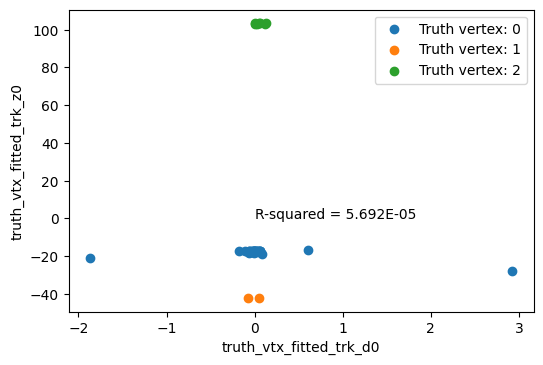

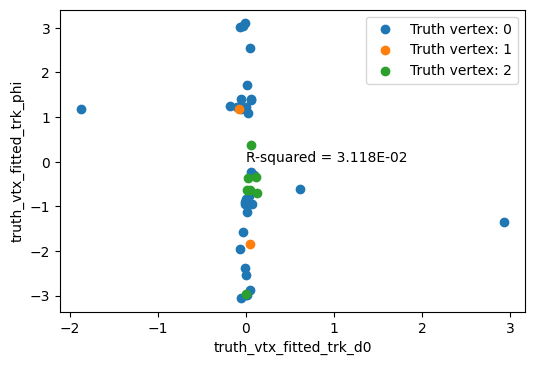

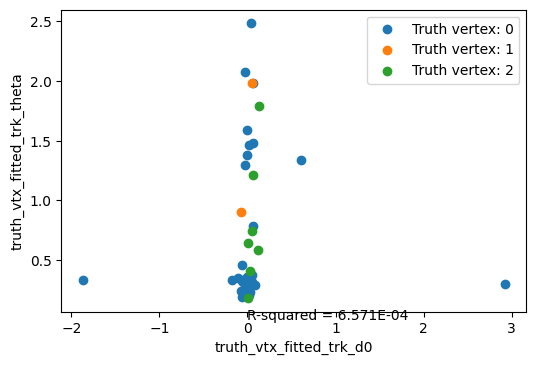

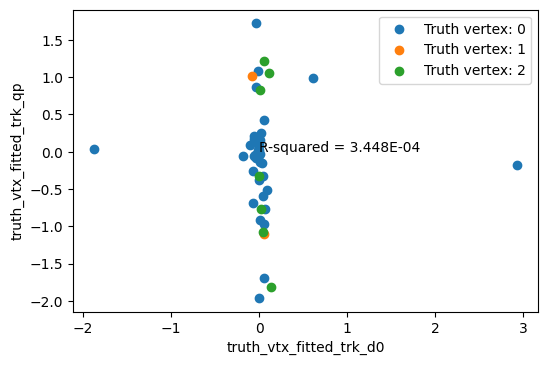

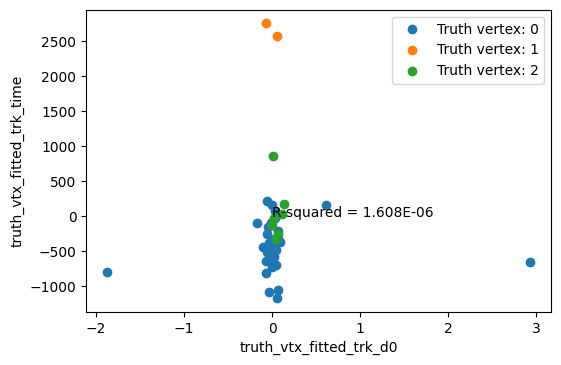

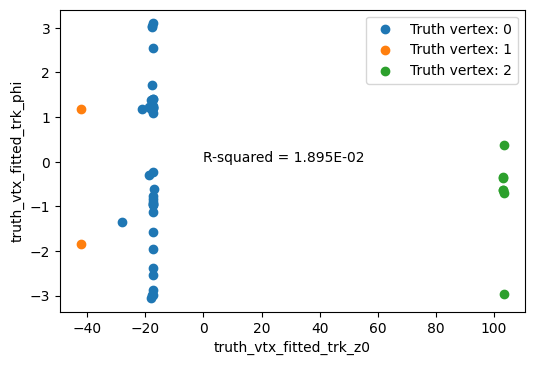

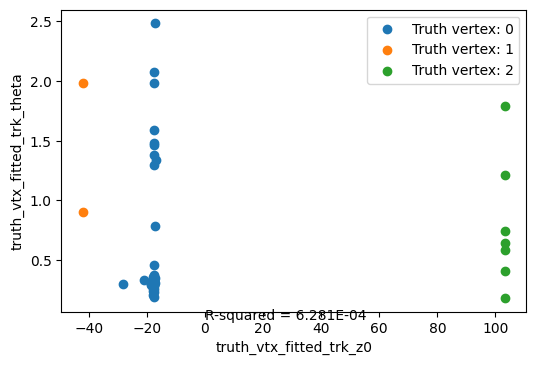

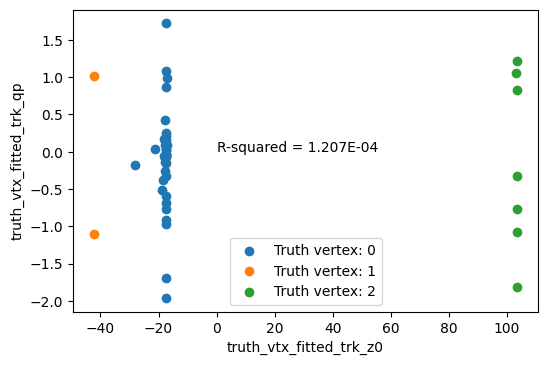

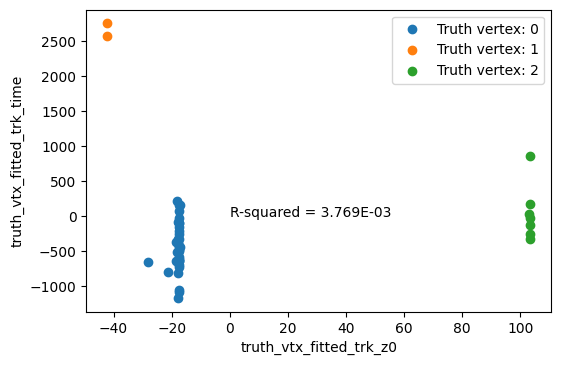

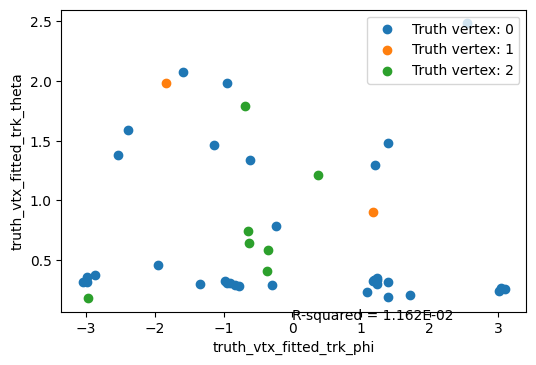

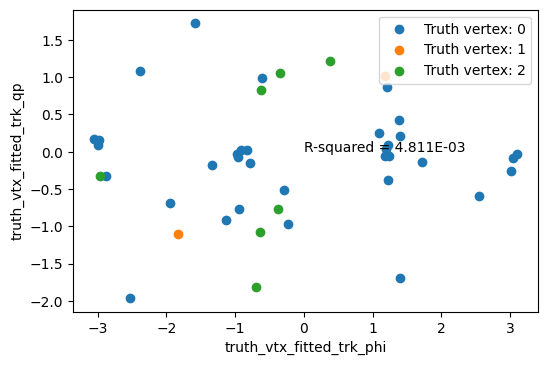

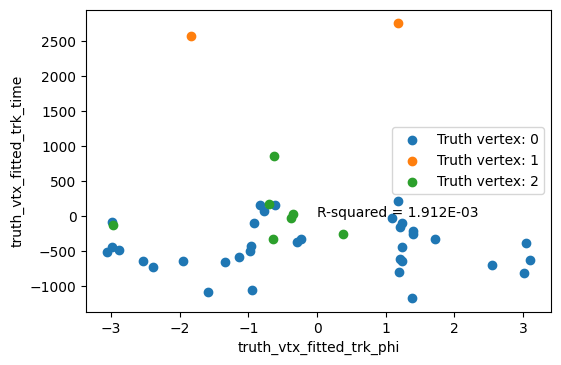

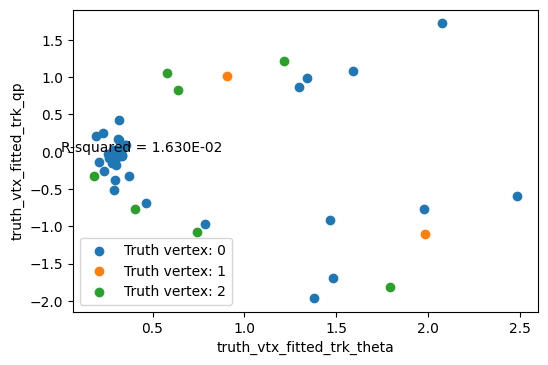

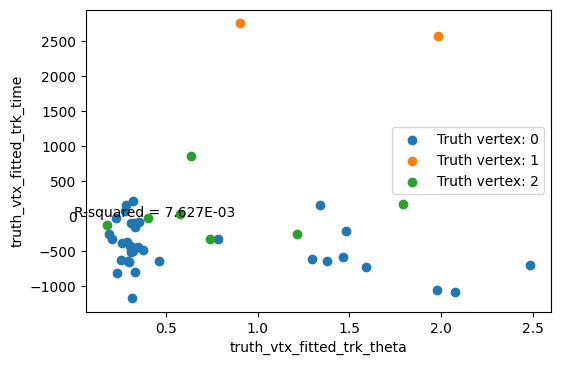

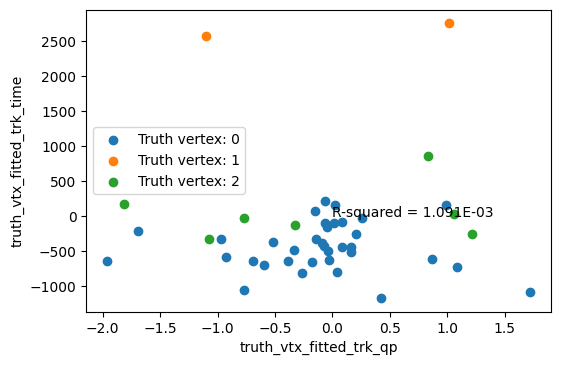

In [16]:
N = 0
n_plots = 6
for i in range(n_plots):
    for j in range(i+1, n_plots):
        n_vtx = np.max(truth_vtx_fitted_trk_vtxID[N])
        fig, ax = plt.subplots(dpi=100)  # Create a figure and an axes.
        for k in range(n_vtx+1):
            label = np.where(truth_vtx_fitted_trk_vtxID[N]==k)
            plt.scatter(truth_tree_arrays[plotting_objects[i]][N][label], truth_tree_arrays[plotting_objects[j]][N][label], label= f"Truth vertex: {k}")
        r_squared = np.corrcoef(truth_tree_arrays[plotting_objects[i]][N],truth_tree_arrays[plotting_objects[j]][N])[0,1]**2
        plt.text(0., 0., f'R-squared = {r_squared:.3E}' )
        plt.legend()
        ax.set_xlabel(plotting_objects[i])
        ax.set_ylabel(plotting_objects[j])



In [13]:
plotting_objects

['truth_vtx_fitted_trk_d0',
 'truth_vtx_fitted_trk_z0',
 'truth_vtx_fitted_trk_phi',
 'truth_vtx_fitted_trk_theta',
 'truth_vtx_fitted_trk_qp',
 'truth_vtx_fitted_trk_time']

In [14]:
# d0, z0, qp

fig = px.scatter_3d(x=truth_tree_arrays[plotting_objects[0]][N], 
                    y=truth_tree_arrays[plotting_objects[1]][N], 
                    z=truth_tree_arrays[plotting_objects[4]][N],
                  color=truth_vtx_fitted_trk_vtxID[N])
fig.update_layout(scene = dict(
                    xaxis_title=plotting_objects[0],
                    yaxis_title=plotting_objects[1],
                    zaxis_title=plotting_objects[4]))
#                     width=700,
#                     margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [17]:
# d0, z0, time 
N = 390
fig = px.scatter_3d(x=truth_tree_arrays[plotting_objects[0]][N], 
                    y=truth_tree_arrays[plotting_objects[1]][N], 
                    z=truth_tree_arrays[plotting_objects[5]][N],
                  color=truth_vtx_fitted_trk_vtxID[N])
fig.update_layout(scene = dict(
                    xaxis_title=plotting_objects[0],
                    yaxis_title=plotting_objects[1],
                    zaxis_title=plotting_objects[5]))
#                     width=700,
#                     margin=dict(r=20, b=10, l=10, t=10))
fig.show()